### Load Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flow.compute import *
from flow.calibrate import *

In [2]:
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
%load_ext autoreload
%autoreload 2

### Compute Optical Flow

In [4]:
# load frames from the high-res video
video_path = './data/231004_101805_video.avi'
video = VideoData(video_path, step=4)

In [5]:
# compute optical flow
optical_flow = video.get_motion(start=0, length=60)

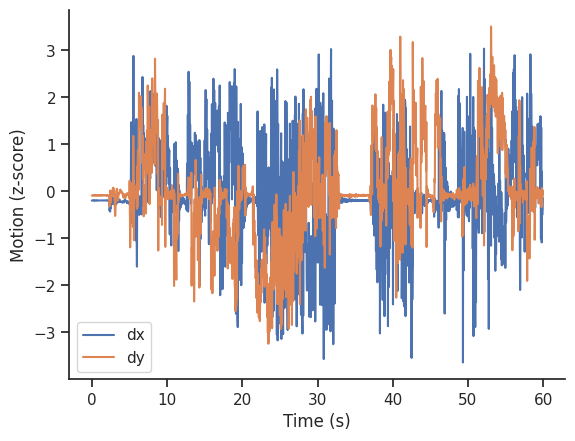

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
optical_flow.plot_motion(ax)
plt.show()

### Cross Correlation

In [10]:
# read in csv file
fl = './data/2023-10-04T10_19_11_b12_all_params_file.csv'
zaber = ZaberData(fl)

zaber_motion, t0, t1 = zaber.get_motion(start=0, length=60)
print(t0, t1)

0.0 59.970086399996944


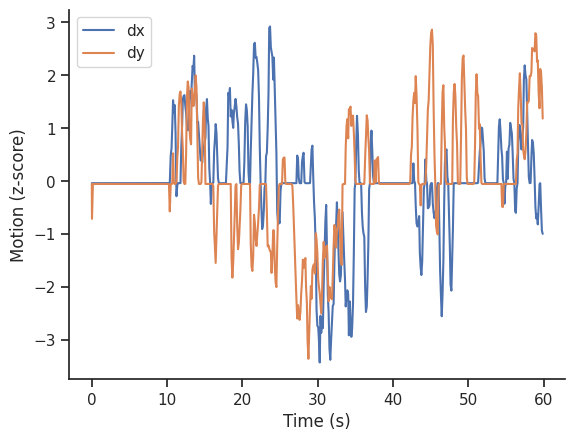

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
zaber_motion.plot_motion(ax)
plt.show()

Z-Score and Cross-Correlate

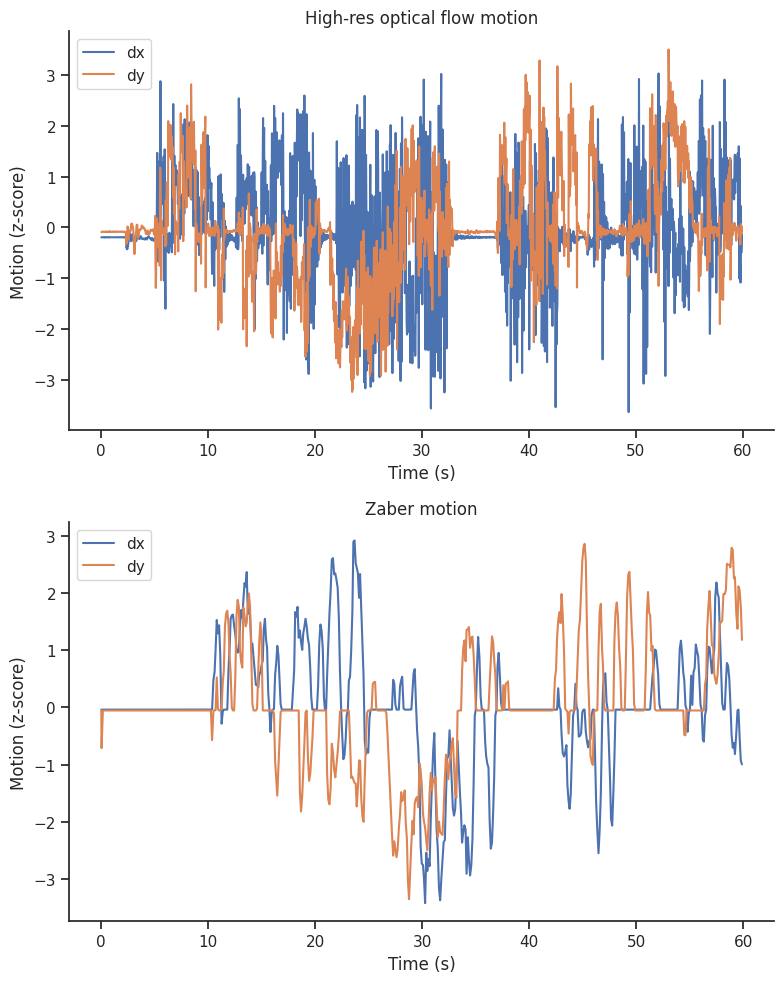

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
optical_flow.plot_motion(axs[0])
axs[0].set_title('High-res optical flow motion')

zaber_motion.plot_motion(axs[1])
axs[1].set_title('Zaber motion')

plt.tight_layout()
plt.show()

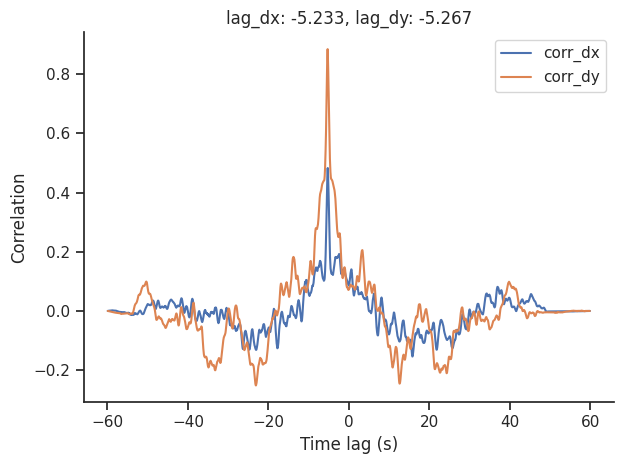

In [12]:
corr_x, corr_y, lags = cross_correlate(optical_flow, zaber_motion)
lag_x = lags[np.argmax(corr_x)]
lag_y = lags[np.argmax(corr_y)]

fig = plt.figure()
plt.plot(lags, corr_x, label='corr_dx')
plt.plot(lags, corr_y, label='corr_dy')
plt.title('lag_dx: {:.3f}, lag_dy: {:.3f}'.format(lag_x, lag_y))
plt.xlabel('Time lag (s)')
plt.ylabel('Correlation')

plt.legend()
plt.tight_layout()
plt.show()

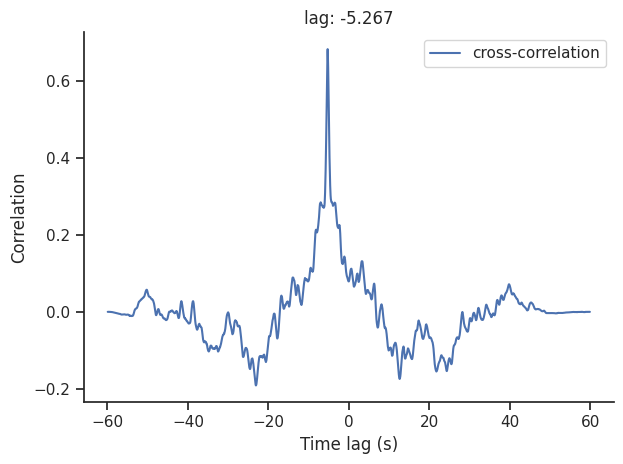

In [13]:
corr, lags = cross_correlate(optical_flow, zaber_motion, combine=True)
lag = lags[np.argmax(corr)]

fig = plt.figure()
plt.plot(lags, corr, label='cross-correlation')
plt.title('lag: {:.3f}'.format(lag))
plt.xlabel('Time lag (s)')
plt.ylabel('Correlation')

plt.legend()
plt.tight_layout()
plt.show()

### Repeat for another video (from p16)

In [4]:
# load frames from the high-res video
video_path = './data/20240313_104327_hs.mp4'
video = VideoData(video_path, step=4)

# compute optical flow
optical_flow = video.get_motion(start=0, length=60)

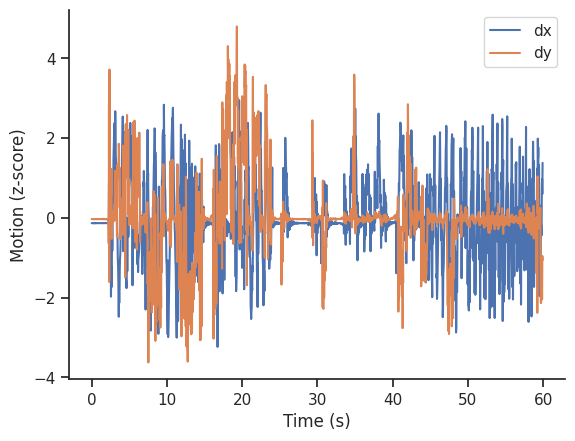

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
optical_flow.plot_motion(ax)
plt.show()

In [6]:
# read in csv file
fl = './data/2024-03-13T10_43_09_p16_all_params_file.csv'
zaber = ZaberData(fl)

zaber_motion, t0, t1 = zaber.get_motion(start=0, length=60)
print(t0, t1)

0.0 60.01096959999995


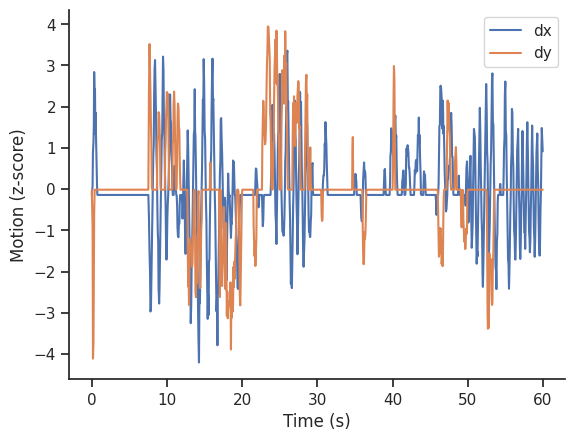

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
zaber_motion.plot_motion(ax)
plt.show()

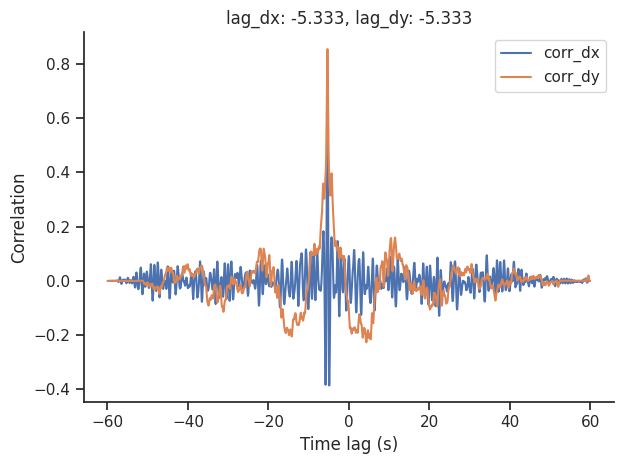

In [8]:
corr_x, corr_y, lags = cross_correlate(optical_flow, zaber_motion)
lag_x = lags[np.argmax(corr_x)]
lag_y = lags[np.argmax(corr_y)]

fig = plt.figure()
plt.plot(lags, corr_x, label='corr_dx')
plt.plot(lags, corr_y, label='corr_dy')
plt.title('lag_dx: {:.3f}, lag_dy: {:.3f}'.format(lag_x, lag_y))
plt.xlabel('Time lag (s)')
plt.ylabel('Correlation')

plt.legend()
plt.tight_layout()
plt.show()

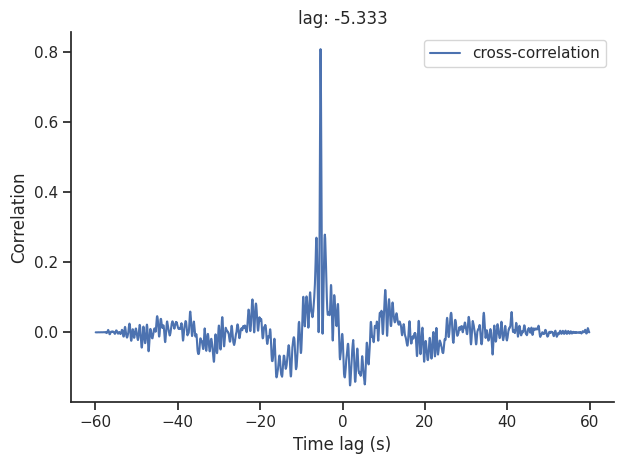

In [9]:
corr, lags = cross_correlate(optical_flow, zaber_motion, combine=True)
lag = lags[np.argmax(corr)]

fig = plt.figure()
plt.plot(lags, corr, label='cross-correlation')
plt.title('lag: {:.3f}'.format(lag))
plt.xlabel('Time lag (s)')
plt.ylabel('Correlation')

plt.legend()
plt.tight_layout()
plt.show()